# Abstract and concrete models

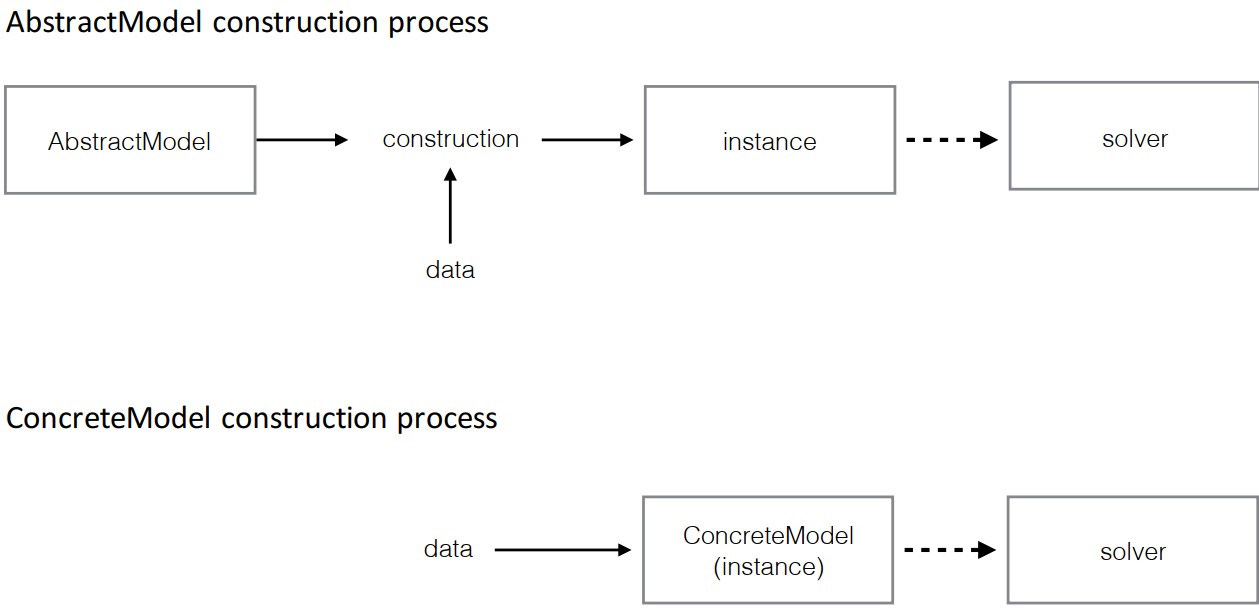

# Example

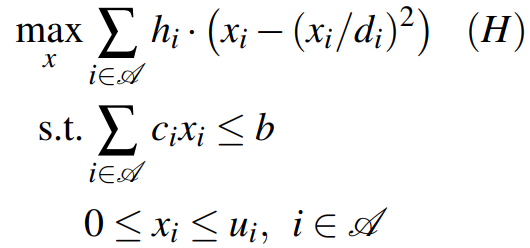

In [1]:
import pyomo.environ as pyo
from pprint import pprint

In [2]:
model = pyo.AbstractModel(name="(H)")

model.A = pyo.Set()

model.h = pyo.Param(model.A)
model.d = pyo.Param(model.A)
model.c = pyo.Param(model.A)
model.u = pyo.Param(model.A)
model.b = pyo.Param()

def xbounds_rule(model, i):
    return (0, model.u[i])
model.x = pyo.Var(model.A, bounds=xbounds_rule)

def budget_rule(model):
    return sum(model.c[i]*model.x[i] for i in model.A) <= model.b
model.budgetconstr = pyo.Constraint(rule=budget_rule)

def obj_rule(model):
    return sum(model.h[i] * (model.x[i] - (model.x[i]/model.d[i])**2) for i in model.A)
model.z = pyo.Objective(rule=obj_rule, sense=pyo.maximize)

In [3]:
solver = pyo.SolverFactory("ipopt")
instance = model.create_instance("F:/D_backup/energy engineering/knowledge hub/energy modeling/books/pyomo_modeling/pyomo_10/data.dat")

In [4]:
solver.solve(instance)
instance.display()

Model '(H)'

  Variables:
    x : Size=2, Index=A
        Key        : Lower : Value              : Upper : Fixed : Stale : Domain
        I_C_Scoops :     0 : 0.3072994118002901 :   100 : False : False :  Reals
           Peanuts :     0 :  40.59999984863514 :  40.6 : False : False :  Reals

  Objectives:
    z : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 4.137409598356854

  Constraints:
    budgetconstr : Size=1
        Key  : Lower : Body               : Upper
        None :  None : 12.000000111911941 :  12.0


# Warehouse Model (Abstract)

In [5]:
model = pyo.AbstractModel(name="(WL)")

model.N = pyo.Set()
model.M = pyo.Set()

model.d = pyo.Param(model.N,model.M)
model.P = pyo.Param()

model.x = pyo.Var(model.N, model.M, bounds=(0,1))
model.y = pyo.Var(model.N, within=pyo.Binary)

def obj_rule(model):
    return sum(model.d[n,m]*model.x[n,m] for n in model.N for m in model.M)
model.obj = pyo.Objective(rule=obj_rule)

def one_per_cust_rule(model, m):
    return sum(model.x[n,m] for n in model.N) == 1
model.one_per_cust = pyo.Constraint(model.M, rule=one_per_cust_rule)

def warehouse_active_rule(model, n, m):
    return model.x[n,m] <= model.y[n]
model.warehouse_active = pyo.Constraint(model.N, model.M, rule=warehouse_active_rule)

def num_warehouses_rule(model):
    return sum(model.y[n] for n in model.N) <= model.P
model.num_warehouses = pyo.Constraint(rule=num_warehouses_rule)

In [6]:
instance = model.create_instance("F:/D_backup/energy engineering/knowledge hub/energy modeling/books/pyomo_modeling/pyomo_10/WHL.dat")
solver = pyo.SolverFactory("glpk")
res = solver.solve(instance)

### Get the OF value

In [7]:
pyo.value(instance.obj)

2745.0

### Print the optimum values of y and x

In [8]:
instance.y.pprint()

y : Size=3, Index=N
    Key       : Lower : Value : Upper : Fixed : Stale : Domain
      Ashland :     0 :   1.0 :     1 : False : False : Binary
    Harlingen :     0 :   1.0 :     1 : False : False : Binary
      Memphis :     0 :   0.0 :     1 : False : False : Binary


In [9]:
instance.x.pprint()

x : Size=12, Index=x_index
    Key                      : Lower : Value : Upper : Fixed : Stale : Domain
      ('Ashland', 'Chicago') :     0 :   1.0 :     1 : False : False :  Reals
      ('Ashland', 'Houston') :     0 :   0.0 :     1 : False : False :  Reals
           ('Ashland', 'LA') :     0 :   0.0 :     1 : False : False :  Reals
          ('Ashland', 'NYC') :     0 :   1.0 :     1 : False : False :  Reals
    ('Harlingen', 'Chicago') :     0 :   0.0 :     1 : False : False :  Reals
    ('Harlingen', 'Houston') :     0 :   1.0 :     1 : False : False :  Reals
         ('Harlingen', 'LA') :     0 :   1.0 :     1 : False : False :  Reals
        ('Harlingen', 'NYC') :     0 :   0.0 :     1 : False : False :  Reals
      ('Memphis', 'Chicago') :     0 :   0.0 :     1 : False : False :  Reals
      ('Memphis', 'Houston') :     0 :   0.0 :     1 : False : False :  Reals
           ('Memphis', 'LA') :     0 :   0.0 :     1 : False : False :  Reals
          ('Memphis', 'NYC') :     0 

### take a look at the avalable methods for a variable

In [10]:
help(instance.x)

Help on IndexedVar in module pyomo.core.base.var object:

class IndexedVar(Var)
 |  IndexedVar(*args, **kwargs)
 |  
 |  An array of variables.
 |  
 |  Method resolution order:
 |      IndexedVar
 |      Var
 |      pyomo.core.base.indexed_component.IndexedComponent
 |      pyomo.core.base.component.Component
 |      pyomo.core.base.component._ComponentBase
 |      pyomo.core.pyomoobject.PyomoObject
 |      pyomo.core.base.indexed_component.IndexedComponent_NDArrayMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fix(self, value=pyomo.common.modeling.NOTSET, skip_validation=False)
 |      Fix all variables in this :class:`IndexedVar` (treat as nonvariable)
 |      
 |      This sets the :attr:`fixed` indicator to True for every variable
 |      in this IndexedVar.  If ``value`` is provided, the value (and
 |      the ``skip_validation`` flag) are first passed to
 |      :meth:`set_value`.
 |  
 |  free(self)
 |      Alias for :meth:`unfix`
 |  
 |  setlb(self, val)

### use .keys() and .values() methods to manipulate the data

In [11]:
x_keys = list(instance.x.keys())
pprint(x_keys)

[('Harlingen', 'NYC'),
 ('Harlingen', 'LA'),
 ('Harlingen', 'Chicago'),
 ('Harlingen', 'Houston'),
 ('Memphis', 'NYC'),
 ('Memphis', 'LA'),
 ('Memphis', 'Chicago'),
 ('Memphis', 'Houston'),
 ('Ashland', 'NYC'),
 ('Ashland', 'LA'),
 ('Ashland', 'Chicago'),
 ('Ashland', 'Houston')]


In [12]:
x_vals = list(map(lambda x: pyo.value(x),instance.x.values()))
pprint(x_vals)

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]


### use keys and values to create a dictinary (then can be saved in an excel file easily)

In [13]:
x_keys_vals_list = dict(zip(x_keys, x_vals))
pprint(x_keys_vals_list)

{('Ashland', 'Chicago'): 1.0,
 ('Ashland', 'Houston'): 0.0,
 ('Ashland', 'LA'): 0.0,
 ('Ashland', 'NYC'): 1.0,
 ('Harlingen', 'Chicago'): 0.0,
 ('Harlingen', 'Houston'): 1.0,
 ('Harlingen', 'LA'): 1.0,
 ('Harlingen', 'NYC'): 0.0,
 ('Memphis', 'Chicago'): 0.0,
 ('Memphis', 'Houston'): 0.0,
 ('Memphis', 'LA'): 0.0,
 ('Memphis', 'NYC'): 0.0}


In [14]:
y_keys = list(instance.y.keys())
y_vals = list(map(lambda y: pyo.value(y),instance.y.values()))
y_keys_vals_list = dict(zip(y_keys,y_vals))

pprint(y_keys_vals_list)

{'Ashland': 1.0, 'Harlingen': 1.0, 'Memphis': 0.0}
